In [1]:
import numpy as np
import pandas as pd

In [2]:
credit_df = pd.read_csv("C:/Users/Mohd idrees/Downloads/German_Credit_Data.csv")

credit_df

# https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
credit_df.iloc[0:5,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [4]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [5]:
credit_df['status'].value_counts()

# 0 Good credit, 1 bad credit

status
0    700
1    300
Name: count, dtype: int64

In [6]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [7]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True)

In [48]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [34]:
X = encoded_credit_df
y = credit_df['status']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [36]:
from sklearn.tree import DecisionTreeClassifier

# criterion to gini, max_depth to 3  
# defaul values for other parameters.

modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [37]:
modelDT.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=3)

# Mesauring Test Accuracy

In [38]:
y_pred = modelDT.predict(X_test)

In [42]:
from sklearn import metrics
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

0.5835743204164258
0.7266666666666667


# Displaying the Tree

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt

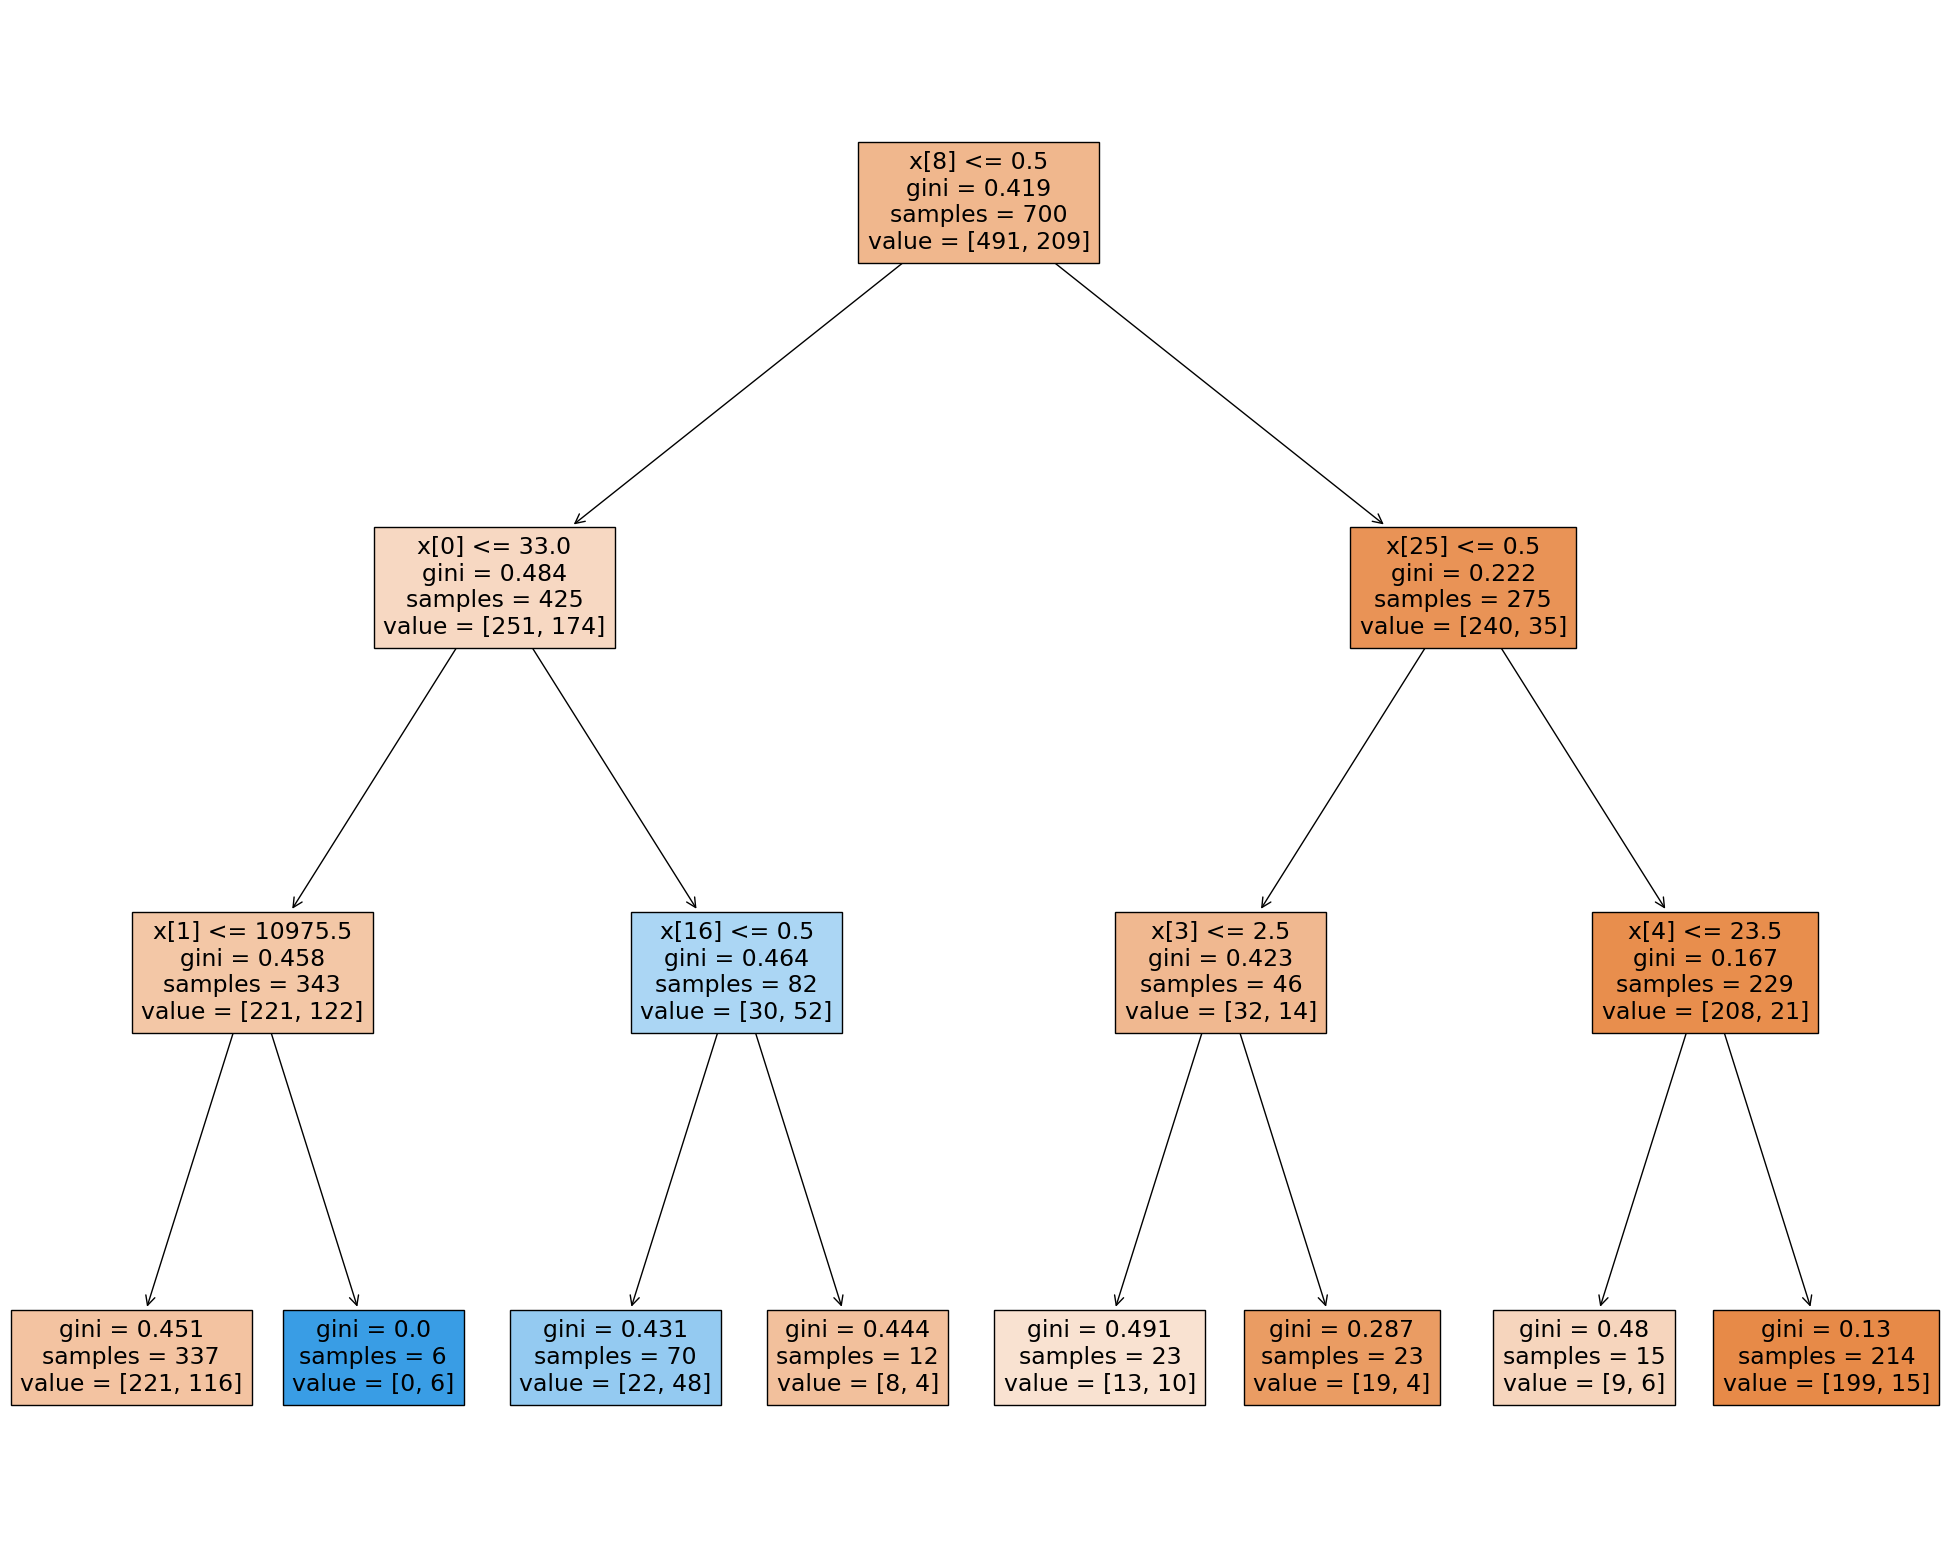

In [51]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(modelDT,
                   filled=True)

In [52]:
from sklearn.model_selection import GridSearchCV

param = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]

model = DecisionTreeClassifier()

modelCV = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [53]:
modelCV.best_score_

0.6833090864917397

In [54]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

# Performance Measures: Decision Tree

In [55]:
pred_y = modelCV.predict(X_test)

In [56]:
print(metrics.confusion_matrix(y_test,pred_y))

[[186  23]
 [ 68  23]]


In [57]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       209
           1       0.50      0.25      0.34        91

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



In [58]:
auc = metrics.roc_auc_score(y_test, modelCV.predict_proba(X_test)[:,1])
auc

0.7093432882906567

# Random Forests

In [59]:
no_of_features = len(X_train.columns)

In [60]:
depth = int(np.log2(no_of_features))
depth

4

In [61]:
## Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and

## n_estimators

modelRF = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=101)

# max_depth - log2(no. of features), log()

modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=101)

In [62]:
auc = metrics.roc_auc_score(y_test, modelRF.predict_proba(X_test)[:,1])
auc

0.7701246122298755

# Grid Search

In [63]:
## Configuring parameters and values for searched

params = [{'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150],
           'max_features': ['sqrt', 0.2, .3, .5]}]

# square root of number of features in the dataset
# 20%, 30%, 50% of the total no. of features
## Initializing the RF classifier

modelRF = RandomForestClassifier(random_state=101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF, params, cv=10, scoring='roc_auc')

## Fitting the training set

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [64]:
modelCV.best_score_

0.7557102040816326

In [65]:
modelCV.best_params_

{'max_depth': 10, 'max_features': 0.3, 'n_estimators': 150}

# Building the Model with the best params

In [66]:
## Initializing the Random Forest Model with the optimal values

model_bp = RandomForestClassifier(max_depth= 10, n_estimators=150, 
                                  max_features = .3, oob_score=True, 
                                  random_state=101)

## Fitting the model with the training set
# oob_score=True
# class balanced

model_bp.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.3, n_estimators=150,
                       oob_score=True, random_state=101)

In [67]:
metrics.roc_auc_score(y_test, model_bp.predict_proba(X_test)[:,1])

0.7703875072296125

# Performance Metrics: Random Forests

In [68]:
pred_y = model_bp.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [70]:
print(confusion_matrix(y_test,pred_y))

[[195  14]
 [ 62  29]]


In [71]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       209
           1       0.67      0.32      0.43        91

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.75      0.71       300



In [72]:
model_bp.oob_score_

0.75

# Drawing the ROC Curve

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model_bp.predict_proba(X_test)[:,1])

In [75]:
roc_auc = metrics.auc(fpr, tpr)

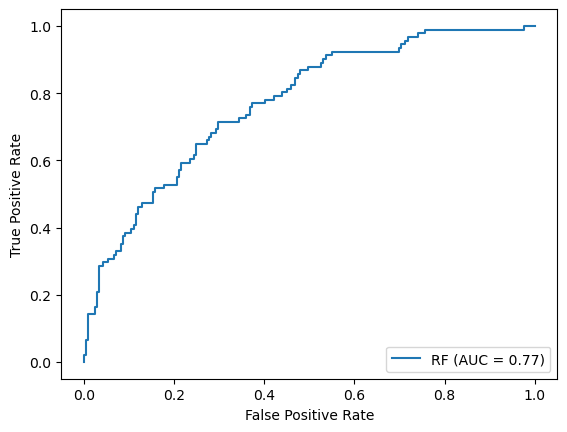

In [76]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='RF')
display.plot()
plt.show()

# Feature Importance

In [77]:
import numpy as np
import seaborn as sn
# Create a dataframe to store the features and their corresponding
# importances

feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': model_bp.feature_importances_})

In [78]:
## Sorting the features based on their importances with most
## important feature at top.

feature_rank = feature_rank.sort_values('importance', ascending = False)

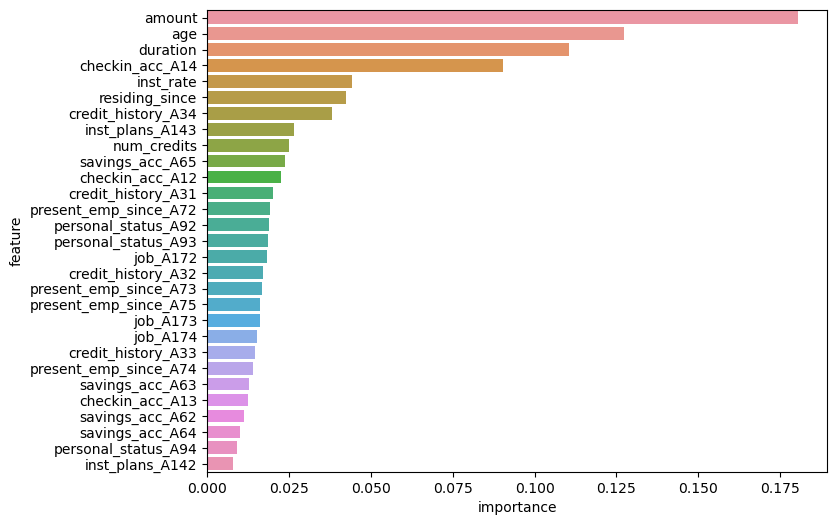

In [79]:
plt.figure(figsize=(8, 6))

# plot the values

sn.barplot(y = 'feature', x = 'importance', data = feature_rank);

In [80]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,amount,0.180274,18.027427
4,age,0.127211,30.748490
0,duration,0.110383,41.786748
8,checkin_acc_A14,0.090499,50.836698
2,inst_rate,0.044287,55.265374
3,residing_since,0.042421,59.507446
12,credit_history_A34,0.038151,63.322569
25,inst_plans_A143,0.026428,65.965382
5,num_credits,0.024940,68.459369
16,savings_acc_A65,0.023955,70.854881


# AdaBoost

In [81]:
## Importing AdaBoost classifier


from sklearn.ensemble import AdaBoostClassifier

## Initializing Decision Tree Classifier to use as base classifier

dt_base_model = DecisionTreeClassifier()

# Initializing AdaBoost classifier with 200 classifers

ada_model = AdaBoostClassifier(dt_base_model, n_estimators=200, random_state=101)

# Fitting AdaBoost model to training set

ada_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                   random_state=101)

# Performance Measures: AdaBoost

In [82]:
pred_y = ada_model.predict(X_test)

In [83]:
print(confusion_matrix(y_test,pred_y))

[[160  49]
 [ 49  42]]


In [84]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       209
           1       0.46      0.46      0.46        91

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.67      0.67       300



In [85]:
auc = metrics.roc_auc_score(y_test, ada_model.predict_proba(X_test)[:,1])
auc

0.6135443503864557

# Gradient Boosting

In [86]:
## Importing Gradient Boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max
## depth as 10

In [87]:
model_gb = GradientBoostingClassifier(n_estimators=500, max_depth=10, random_state=101)

## Fitting gradient boosting model to training set

model_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=101)

In [88]:
auc = metrics.roc_auc_score(y_test, model_gb.predict_proba(X_test)[:,1])
auc

0.7327935222672065

# Grid Search CV

In [89]:
from sklearn.model_selection import GridSearchCV

param = [{'n_estimators': [100, 200, 400], 'learning_rate': [.01,.05,.1]}]

model = GradientBoostingClassifier(random_state=101)

modelCV = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')

modelCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
                          'n_estimators': [100, 200, 400]}],
             scoring='roc_auc')

In [90]:
modelCV.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [91]:
modelCV.best_score_

0.7397752186588921

# Performance Measures - Gradient Boosting

In [92]:
pred_y = modelCV.predict(X_test)

In [93]:
print(confusion_matrix(y_test,pred_y))

[[187  22]
 [ 54  37]]


In [94]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.63      0.41      0.49        91

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300



In [95]:
auc = metrics.roc_auc_score(y_test, modelCV.predict_proba(X_test)[:,1])
auc

0.7818497292181503